In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [4]:
df = pd.read_csv("countries.csv")

In [5]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [6]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

# convert to float

In [8]:
columns_to_keep_as_int = ['Population', 'Area (sq. mi.)']
columns_to_skip = ['Region', 'Country'] + columns_to_keep_as_int

for col in df.columns:
    if col not in columns_to_skip and df[col].dtype == 'O':
        df[col] = df[col].str.replace(',', '').astype(float)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [10]:
df.groupby('Region')['Literacy (%)'].apply(lambda x: x.mode().max())

Region
ASIA (EX. NEAR EAST)                   990.0
BALTICS                                998.0
C.W. OF IND. STATES                    996.0
EASTERN EUROPE                         999.0
LATIN AMER. & CARIB                    980.0
NEAR EAST                              976.0
NORTHERN AFRICA                        826.0
NORTHERN AMERICA                       970.0
OCEANIA                                990.0
SUB-SAHARAN AFRICA                     970.0
WESTERN EUROPE                         990.0
Name: Literacy (%), dtype: float64

In [11]:
for col in df.columns.values:
    
    # Skip columns with no missing values
    if df[col].isnull().sum() == 0:
        continue

    # For categorical column
    if col == 'Climate':
        guess_value = df.groupby('Region')['Climate'] \
                        .apply(lambda x: x.mode().max())
    else:
        # For numerical columns
        guess_value = df.groupby('Region')[col].median()

    for region in df["Region"].unique():
        df[col].loc[(df[col].isnull())&(df["Region"]==region)] =guess_value[region]

In [12]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [13]:
df.shape


(227, 20)

# Data Analysis part

In [14]:
region = df["Region"].nunique()
countries=df["Country"].nunique()
region_countries=df["Region"].value_counts()

In [15]:
region = df["Region"].nunique()
countries = df["Country"].nunique()
region_countries = df["Region"].value_counts()

print("Number of unique regions:", region)
print("Number of unique countries:", countries)
print("\nCountries count per region:")
print(region_countries)

Number of unique regions: 11
Number of unique countries: 227

Countries count per region:
Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64


In [16]:
gdp_reagion_avg=round(df.groupby("Region")[["GDP ($ per capita)","Literacy (%)","Agriculture"]].mean(),2)
gdp_reagion_avg

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),8053.57,795.54,124.29
BALTICS,11300.00,997.33,21.00
C.W. OF IND. STATES,4000.00,987.25,192.00
EASTERN EUROPE,9808.33,974.67,83.17
LATIN AMER. & CARIB,8682.22,907.30,57.02
NEAR EAST,10456.25,799.56,48.06
NORTHERN AFRICA,5550.00,677.00,134.50
NORTHERN AMERICA,26100.00,977.00,5.20
OCEANIA,8247.62,900.10,105.98


In [17]:
df. columns


Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [18]:
def join_countries(data):
    return ",".join(data.astype(str))

region_data = df.groupby("Region").agg({
    "Country": join_countries,
    "Population": "sum",
    "Area (sq. mi.)": "sum",
    "Pop. Density (per sq. mi.)": "mean",
    "Coastline (coast/area ratio)": "mean",
    "Net migration": "mean",
    "Infant mortality (per 1000 births)": "mean",
    "GDP ($ per capita)": "mean",
    "Literacy (%)": "mean",
    "Phones (per 1000)": "mean",
    "Arable (%)": "mean",
    "Crops (%)": "mean",
    "Other (%)": "mean",
    "Climate": join_countries,
    "Birthrate": "mean",
    "Deathrate": "mean",
    "Agriculture": "mean",
    "Industry": "mean",
    "Service": "mean"
})
region_data



,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),"Afghanistan ,Bangladesh ,Bhutan ,Brunei ,Burma...",3687982236,23096712,12648.250000,1792.678571,149.142857,3784.892857,8053.571429,795.535714,1672.428571,1266.035714,330.892857,7161.392857,"1.0,2.0,2.0,2.0,2.0,2.0,15.0,2.0,2.0,25.0,2.0,...",1688.285714,722.892857,124.285714,231.750000,386.714286
BALTICS,"Estonia ,Latvia ,Lithuania",7184974,175015,398.333333,311.666667,-203.333333,810.333333,11300.000000,997.333333,2928.666667,3031.000000,61.000000,6908.000000,"3.0,3.0,3.0",934.333333,1263.000000,21.000000,293.333333,475.666667
C.W. OF IND. STATES,"Armenia ,Azerbaijan ,Belarus ,Georgia ,Kazakhs...",280081548,22100843,567.083333,9.333333,-131.333333,3907.750000,4000.000000,987.250000,1638.500000,1475.916667,180.500000,7217.083333,"4.0,1.0,4.0,3.0,4.0,25.0,4.0,4.0,2.0,1.0,3.0,1.0",1364.833333,969.666667,192.000000,299.500000,411.916667
EASTERN EUROPE,"Albania ,Bosnia & Herzegovina ,Bulgaria ,Croat...",119914717,1152222,1009.000000,103.500000,-67.000000,1268.666667,9808.333333,974.666667,2807.500000,2633.250000,219.083333,6658.750000,"3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0",950.833333,1028.666667,83.166667,283.000000,509.416667
LATIN AMER. & CARIB,"Anguilla ,Antigua & Barbuda ,Argentina ,Aruba ...",561824599,20544084,1362.022222,1597.222222,-138.244444,1854.866667,8682.222222,907.300000,2705.766667,895.688889,428.755556,7167.777778,"2.0,2.0,3.0,2.0,2.0,2.0,2.0,15.0,2.0,2.0,2.0,3...",1777.511111,613.000000,57.022222,170.066667,415.288889
NEAR EAST,"Bahrain ,Cyprus ,Gaza Strip ,Iraq ,Israel ,Jor...",195068377,4355586,4270.812500,360.250000,256.000000,1991.812500,10456.250000,799.562500,2092.312500,956.937500,510.562500,7196.375000,"1.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1....",2403.062500,388.125000,48.062500,343.562500,418.625000
NORTHERN AFRICA,"Algeria ,Egypt ,Libya ,Morocco ,Tunisia ,Weste...",161407133,6018890,389.333333,31.833333,-42.500000,2108.666667,5550.000000,677.000000,1041.000000,743.500000,280.500000,7950.000000,"1.0,1.0,1.0,1.0,3.0,1.0",2100.833333,486.000000,134.500000,315.666667,283.500000
NORTHERN AMERICA,"Bermuda ,Canada ,Greenland ,St Pierre & Miquel...",331672307,21782471,2608.600000,4964.000000,-27.400000,745.800000,26100.000000,977.000000,6867.400000,746.600000,4.800000,5288.600000,"2.0,3.0,1.0,3.0,3.0",1110.200000,629.000000,5.200000,181.400000,585.600000
OCEANIA,"American Samoa ,Australia ,Cook Islands ,Fiji ...",33131662,8519812,1311.809524,10788.571429,-136.285714,1948.142857,8247.619048,900.095238,1898.857143,543.857143,1273.952381,5352.761905,"2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3....",2112.809524,518.142857,105.976190,163.095238,494.119048


# Top 15 Countries GDP per capita
The resulting bar plot visually compares the GDP per capita of the top 15 countries with the global average, allowing for easy identification of the wealthiest nations.

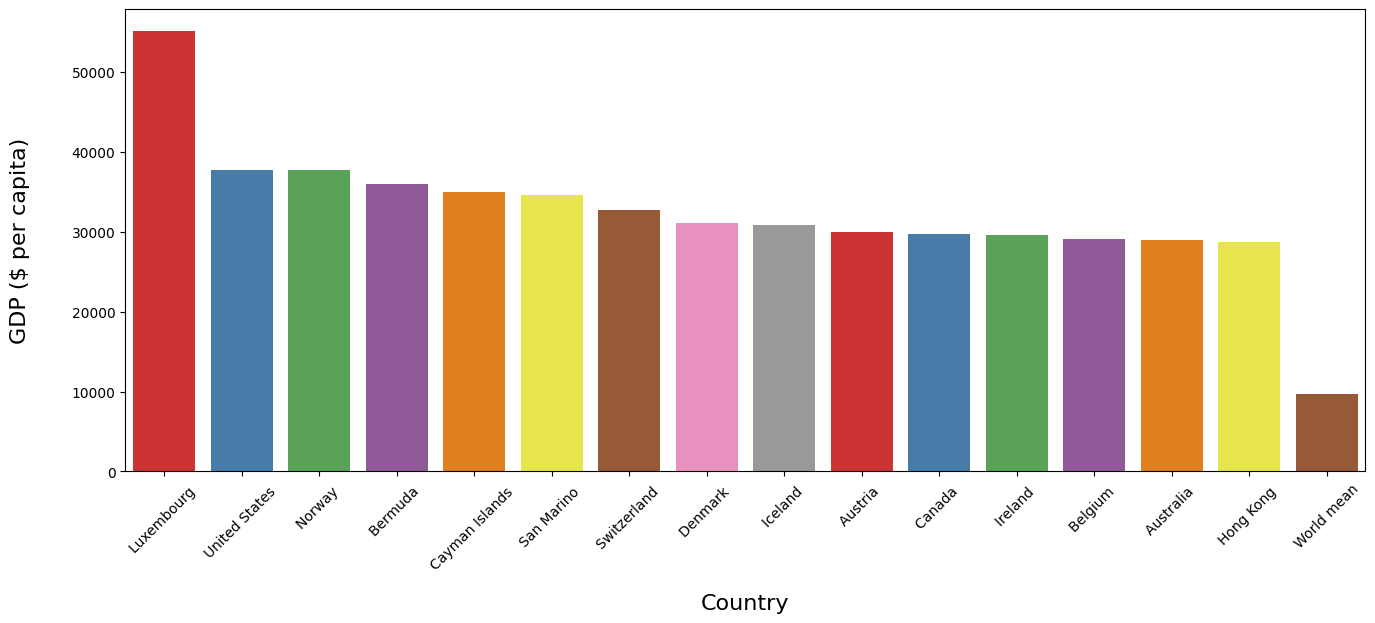

In [19]:
fig, ax= plt.subplots(figsize=(16,6))
top_gdp_countries = df.sort_values('GDP ($ per capita)', ascending=False).head(15)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)': [df['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']], mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data = gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=45)
plt.show()

# Top Five  Countries Literacy Rate and GDP for  Asia Region

In [21]:
top_five_asia_countries_literacy = df[df['Region'].str.strip() == 'ASIA (EX. NEAR EAST)'].nlargest(5,'Literacy (%)')
top_five_asia_countries_literacy = top_five_asia_countries_literacy[['Country','Literacy (%)','GDP ($ per capita)']]

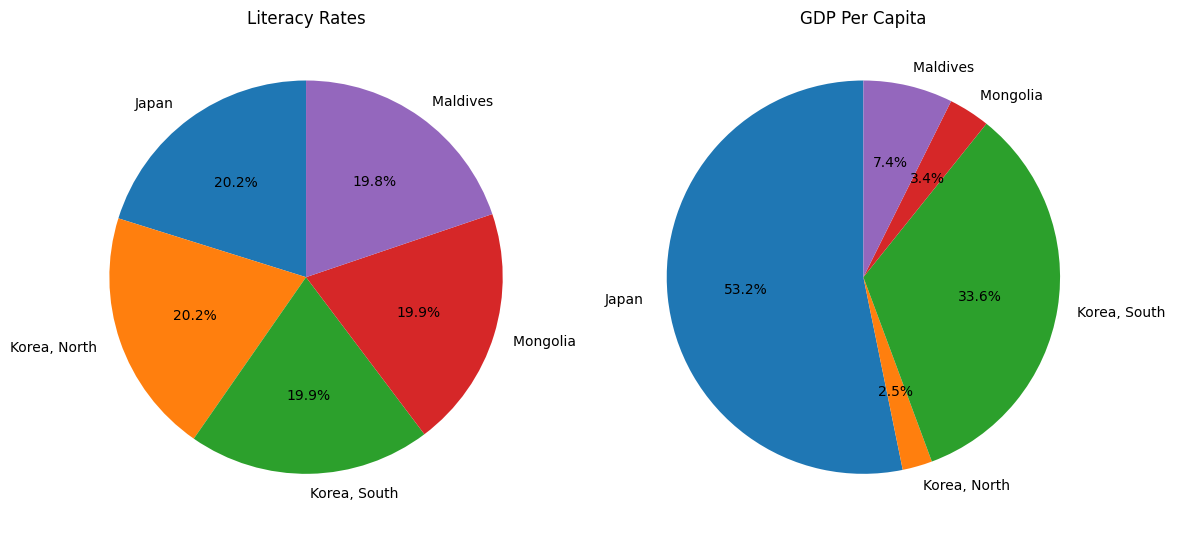

In [22]:
labels = top_five_asia_countries_literacy['Country']
literacy_rates = top_five_asia_countries_literacy['Literacy (%)']
gdp_values = top_five_asia_countries_literacy['GDP ($ per capita)']

fig,axes = plt.subplots(1,2,figsize=(12,6))


# Create a pie chart for literacy rates
axes[0].pie(literacy_rates, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Literacy Rates')

# Create a pie chart for GDP per capita
axes[1].pie(gdp_values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('GDP Per Capita')

plt.tight_layout()
plt.show()

# Top Fve Countries GDP Per each Region

In [23]:
for i in range(num_subplots):
    ax=axes[i]
    countries = df[df['Region'] == regions[i]]

NameError: name 'num_subplots' is not defined

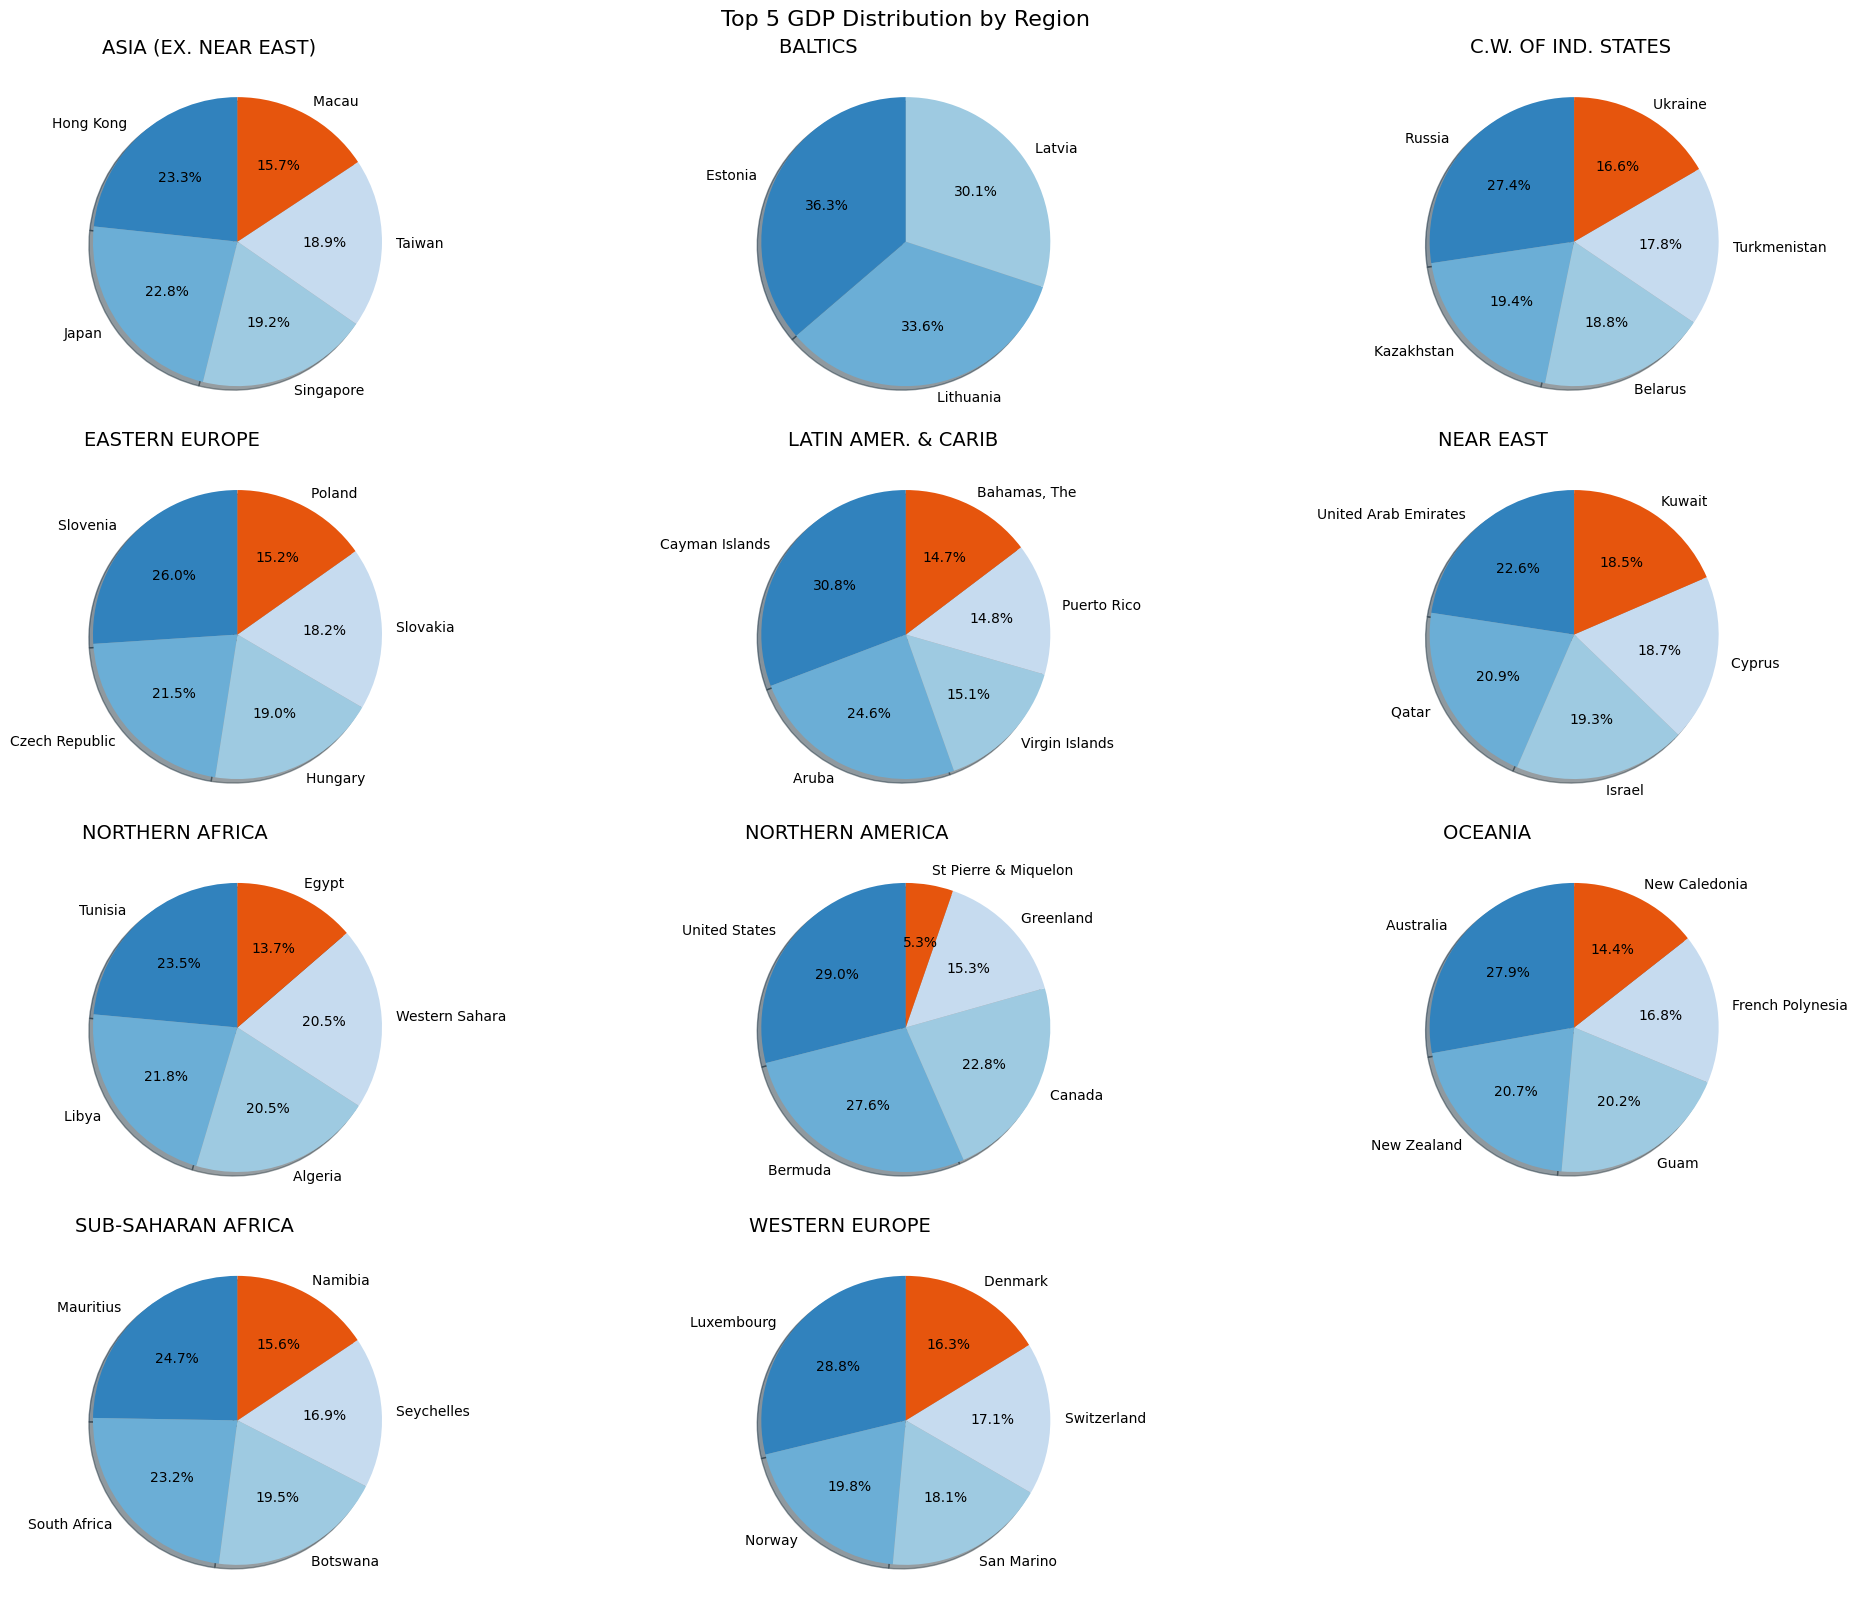

In [24]:
# Group the DataFrame by 'Region' and calculate the mean GDP for each region
region_gdp = df.groupby('Region')['GDP ($ per capita)'].mean()
# Get the regions and mean GDP values
regions = region_gdp.index
mean_gdp = region_gdp.values
# Calculate the number of subplots needed
num_subplots = len(regions)
num_cols = 3  # Set the number of columns for the grid
# Calculate the number of rows needed
num_rows = (num_subplots - 1) // num_cols + 1
# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)
axes = axes.ravel()  # Flatten the 2D array of subplots
# Customize parameters for better readability and spacing
colors = plt.cm.tab20c(np.arange(20))
autopct = '%1.1f%%'
shadow = True
for i in range(num_subplots):
    ax = axes[i]
    # Get the countries in the current region
    countries = df[df['Region'] == regions[i]]
    # Calculate the top 5 countries with the highest GDP in the current region
    top_countries = countries.nlargest(5, 'GDP ($ per capita)')
    # Get the top 5 countries and their mean GDP values
    country_names = top_countries['Country']
    country_gdp = top_countries['GDP ($ per capita)']
    # Generate colors for the top 5 countries
    region_colors = colors[:len(country_names)]
    
    # Define explode based on the number of countries in the region
    explode = [0] * len(country_names)
    
    ax.pie(country_gdp, labels=country_names, autopct=autopct, startangle=90,
           colors=region_colors, shadow=shadow, explode=explode)
    ax.set_aspect('equal')  # Ensure the pie is drawn as a circle
    ax.set_title(f'{regions[i]}', fontsize=14)
    
# Hide any remaining empty subplots
for i in range(num_subplots, num_cols * num_rows):
    fig.delaxes(axes[i])

# Add some space between the plots
plt.subplots_adjust(wspace=0.5)

# Show the pie charts
plt.suptitle("Top 5 GDP Distribution by Region", fontsize=16)
plt.show()


# Correlation

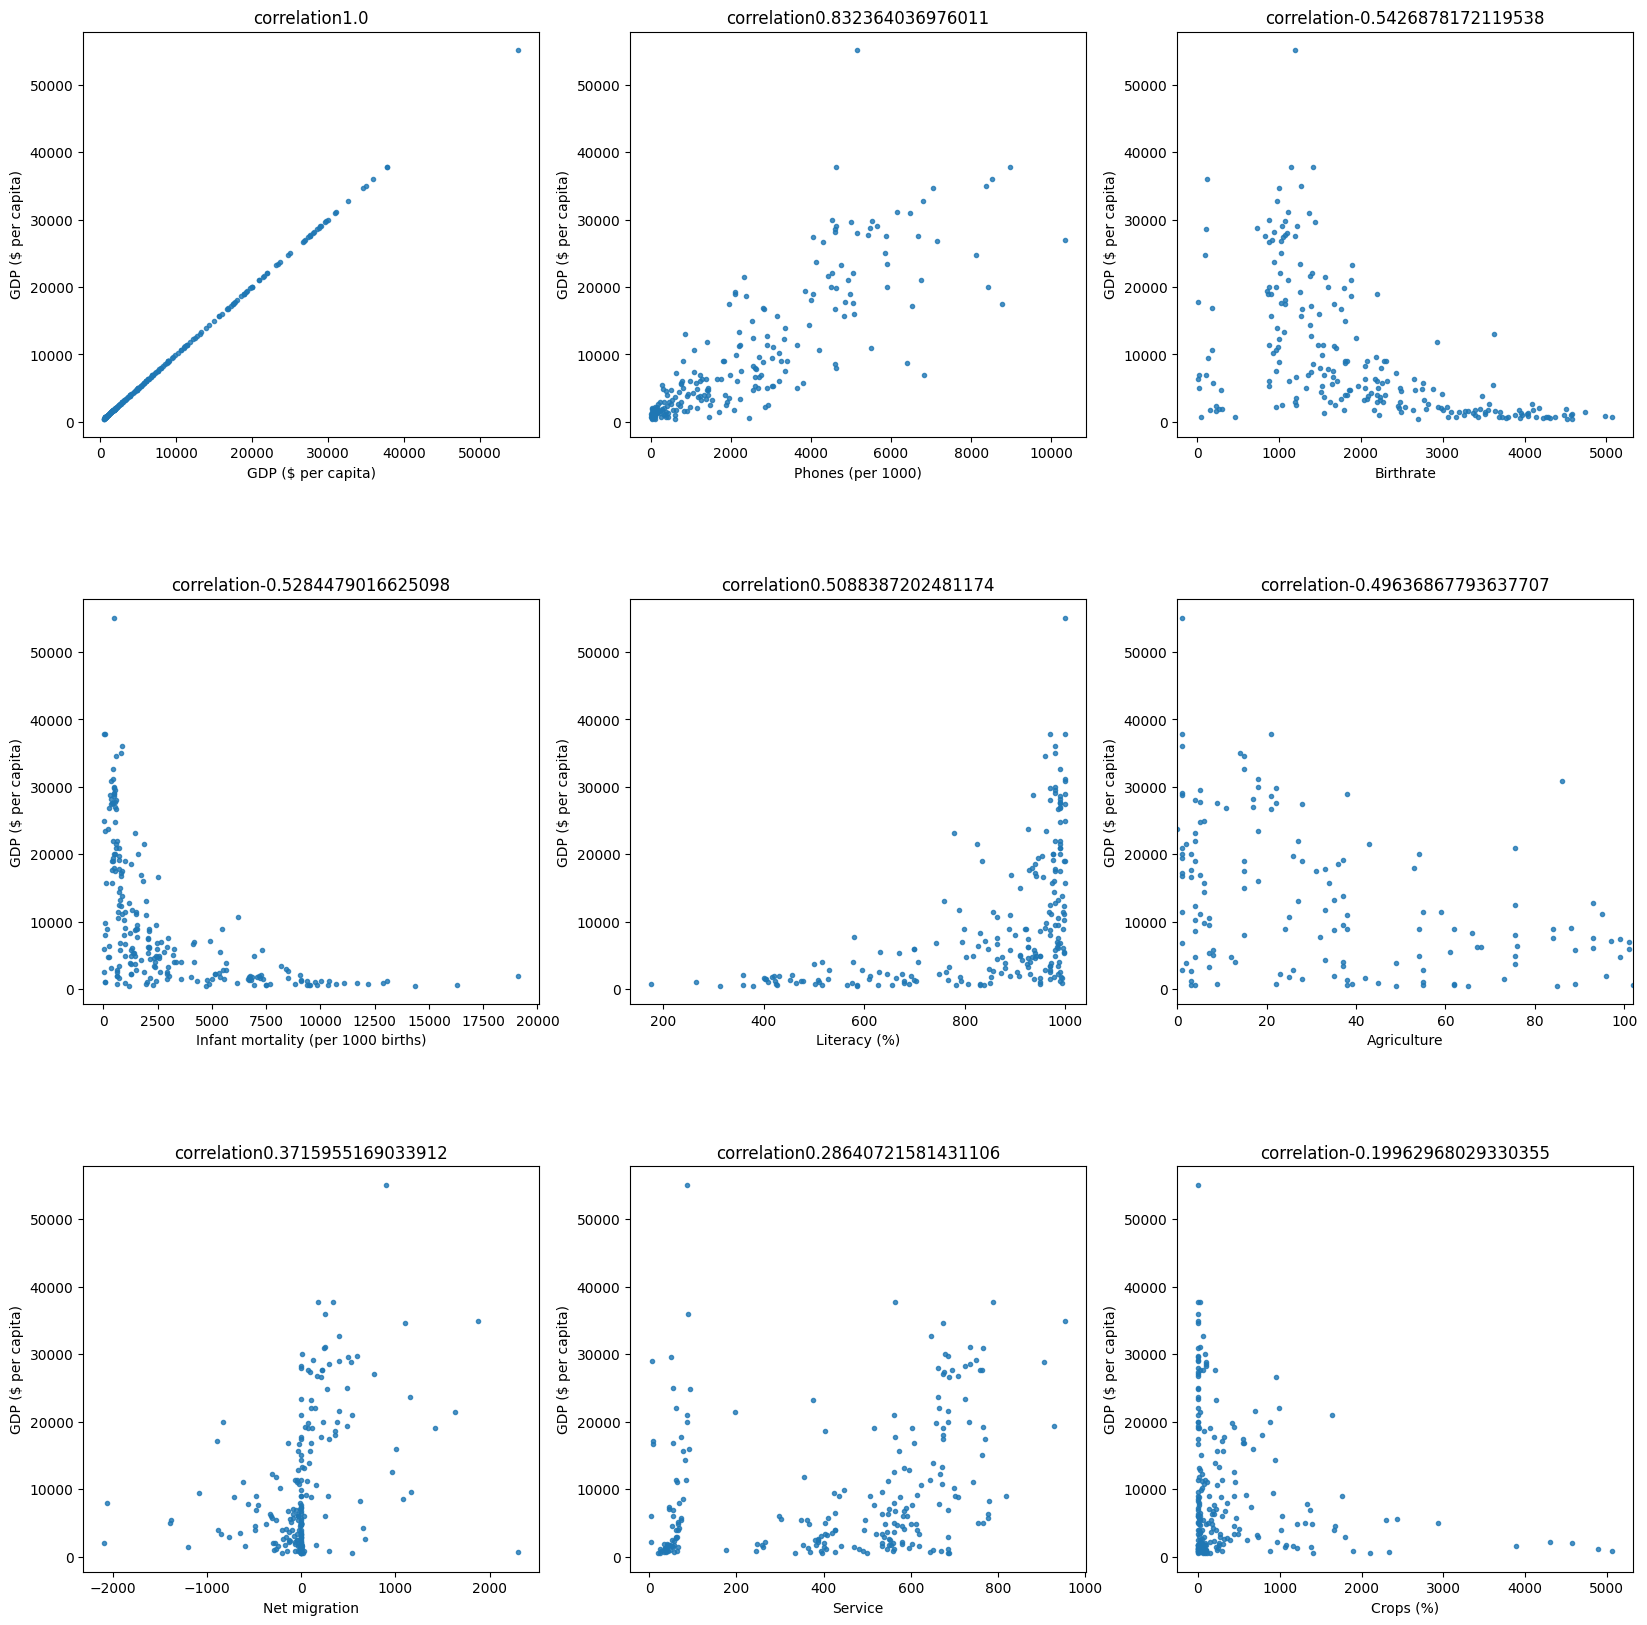

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!="GDP ($ per capita") & (col!="Climate")):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df, ax=axes[i,j],fit_reg=False, marker='.')
        title = "correlation"+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

# 4. Modeling

Training and testing

First label encode the categorical features 'Regrion' and 'Climate', and while just use all features given in the dataset without further enginerring.

In [26]:
LE = LabelEncoder()
df['Regional_label'] = LE.fit_transform(df['Region'])

In [27]:
X = df.drop(['Country','Region','GDP ($ per capita)'],axis=1)
y = df['GDP ($ per capita)']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

In [29]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((158, 18), (69, 18), (158,), (69,))

# 1 Linear Regresion

In [30]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_pred_y = model_lr.predict(X_train)
test_pred_y = model_lr.predict(X_test)
train_pred_y = pd.Series(train_pred_y.clip(0,train_pred_y.max()), index=y_train.index)
test_pred_y = pd.Series(test_pred_y.clip(0,test_pred_y.max()), index=y_test.index)

# Matrices

In [31]:
from sklearn.metrics import r2_score
print("train score :", r2_score(train_pred_y,y_train))
print('test score :',r2_score(test_pred_y,y_test))
print("rmse_train :",np.sqrt(mean_squared_error(train_pred_y,y_train)))
print("msle_train :", mean_squared_log_error(train_pred_y,y_train))
print("rmse_test :", np.sqrt(mean_squared_error(test_pred_y,y_test)))
print("msle_test :", mean_squared_log_error(test_pred_y,y_test))

train score : 0.7096483815345425
test score : 0.7063770447757163
rmse_train : 4612.353516021021
msle_train : 4.75196650552236
rmse_test : 5104.456370273423
msle_test : 8.562443926690795


# Predictive System

In [32]:
input_data = X_test.iloc[10].values.reshape(1, -1)
model_lr.predict(input_data)

array([2085.03687808])

In [33]:
y_test.iloc[10]

1100.0

# 2 Random Forest

In [34]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
train_pred_y = model_rf.predict(X_train)
test_pred_y = model_rf.predict(X_test)
train_pred_y = pd.Series(train_pred_y.clip(0,train_pred_y.max()), index=y_train.index)
test_pred_y = pd.Series(test_pred_y.clip(0,test_pred_y.max()), index=y_test.index)


In [35]:
from sklearn.metrics import r2_score
print("train score :", r2_score(train_pred_y,y_train))
print('test score :',r2_score(test_pred_y,y_test))
print("rmse_train :",np.sqrt(mean_squared_error(train_pred_y,y_train)))
print("msle_train :", mean_squared_log_error(train_pred_y,y_train))
print("rmse_test :", np.sqrt(mean_squared_error(test_pred_y,y_test)))
print("msle_test :", mean_squared_log_error(test_pred_y,y_test))




train score : 0.959832723923388
test score : 0.8157767327472171
rmse_train : 1868.754604583464
msle_train : 0.08481372015079723
rmse_test : 4234.593036928791
msle_test : 0.3220748437163604


In [36]:
model_rf.predict(X_train.iloc[10].values.reshape(1,-1))

array([21611.])

In [37]:
y_train.iloc[10]

22000.0

# 3 Decision Tree Regressor

In [38]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train,y_train)
train_pred_y = model_dtr.predict(X_train)
test_pred_y = model_dtr.predict(X_test)
train_pred_y = pd.Series(train_pred_y.clip(0,train_pred_y.max()), index=y_train.index)
test_pred_y = pd.Series(test_pred_y.clip(0,test_pred_y.max()), index=y_test.index)

from sklearn.metrics import r2_score
print("train score :", r2_score(train_pred_y,y_train))
print('test score :',r2_score(test_pred_y,y_test))
print("rmse_train :",np.sqrt(mean_squared_error(train_pred_y,y_train)))
print("msle_train :", mean_squared_log_error(train_pred_y,y_train))
print("rmse_test :", np.sqrt(mean_squared_error(test_pred_y,y_test)))
print("msle_test :", mean_squared_log_error(test_pred_y,y_test))

train score : 1.0
test score : 0.697280369027927
rmse_train : 0.0
msle_train : 0.0
rmse_test : 6155.42649719082
msle_test : 0.4867950712612061


In [39]:
model_dtr.predict(X_train.iloc[11].values.reshape(1,-1))

array([27000.])

In [40]:
y_train.iloc[11]

27000.0

In [41]:
X_train.iloc[11].values

array([3.25430e+04, 2.00000e+00, 1.62715e+05, 2.05000e+04, 7.75000e+02,
       5.43000e+02, 9.90000e+02, 1.03560e+04, 0.00000e+00, 0.00000e+00,
       1.00000e+02, 3.00000e+00, 9.19000e+02, 1.29100e+03, 1.70000e+01,
       2.13500e+02, 6.74500e+02, 1.00000e+01])

In [42]:
import pickle
pickle.dump(model_dtr,open('model_dtr.pkl','wb'))

In [43]:
import sklearn
print(sklearn.__version__)

1.7.2
